# Dam Impacts on Global River Connectivity
Korrina Rantz, Brian Pinke, and Emi Fergus 
In partnership with Jeff Opperman and Natalie Sharbol WWF
4/30/2021

## Importance

Only one-third of the world’s large rivers still have their free-flowing status. The loss of connectivity in rivers has major global impacts. Rivers are essential for both human needs and ecosystem health.  They provide humans with food and water, domestically and agriculturally, and also can be sources of transportation and power through hydroelectric generation. We have used dams to control rivers for our needs and this fragmentation has had a negative impact on biodiversity and the overall health of riparian systems. The disruption in movement and exchange of water, nutrients, organisms and sediment has impacted ecosystem processes.  

We know that dams have the biggest impact on a rivers' free-flowing status so our main objective will be to quantify which types of dams have the largest impact. If we can use dam classification to understand more specifically the impacts they have on rivers then we can help conservation efforts be more concentrated and have a better understanding of what issues need to be addressed.  This will also be helpful to create sound arguments against the construction of new dams and help with proposals to remove existing dams. We also want to understand how the biggest impact dam on a river’s free flowing status varies by Continent, Country, River Basin, and River Size.

## Previous Studies

There has been a lot of research done on the connectivity of rivers and also the classification of dams. This work just has not been put together. Our two major sources for data will be from “Mapping the worlds free-flowing rivers Geodatabase” (FFR) and “Global River and Dam Database” (GRanD). The Nature publication of “Mapping the world’s free-flowing rivers” created a global database of FFR and assigned a Connectivity Status Index to each reach (figure 1), and the GRanD team created a database of global large dams and reservoirs with Main Use attributes (figure 2). Both datasets will be vital resources for our project.
In addition, in 2020, a different Earth Data Analytics group tackled a similar idea, focusing on how future hydropower dams would affect the FFR and protected areas around the globe. 

![FreeFlowingRiversCSI](https://ndownloader.figshare.com/files/27829941)
Figure 1: Free Flowing Rivers of the World with Connectivity Status Index (Grill et al., 2019).

![GrandImage](https://ndownloader.figshare.com/files/27829938)
Figure 2: Global distribution (by country) of large reservoirs and dams in GRanD database (GRanD Technical Documentation V1.3).

## Methods

Our aim is to work on a global scale. We have two large geodatabases that we need to process: 1) GRanD and 2) FFR. Both datasets are described in <a href=”https://www.nature.com/articles/s41586-019-1111-9” target="_blank">"Mapping the world's free flowing rivers" paper</a>. Opening the data for the FFR was particularly challenging because of its size of over 10 million river reaches.  There are over 7,000 dams with attributes distributed across the globe in the GRanD dataset and over 5,700 dams have a designated main purpose of use so it was easier to access. Both datasets can be read into geopandas and the data can be explored. We created a global map with country boundaries and plotted the dams by type (figure 3).

In [1]:
# Import packages, set working directory
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import fiona
import geopandas as gpd
import rasterio as rio
import requests
import seaborn as sns
import zipfile
import earthpy as et
import urllib.request
import warnings

# Ignore runtime warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Download data and set working directory
# Country boundaries
et.data.get_data(url="https://ndownloader.figshare.com/files/22507058")

# Continent boundaries
et.data.get_data(url="https://ndownloader.figshare.com/files/23392280")

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

# Download GRanD data and unzip data
grand = et.data.get_data(url="https://ln.sync.com/dl/bd47eb6b0/anhxaikr-62pmrgtq-k44xf84f-pyz4atkm")
   
with zipfile.ZipFile("GRanD_Version_1_3.zip","r") as zip_ref:
    zip_ref.extractall("earthpy-downloads")
    print('File is unzipped in earthpy-downloads folder') 

# Download Free-Flowing Rivers global data from website
et.data.get_data(url="https://ndownloader.figshare.com/files/15090536")

File is unzipped in earthpy-downloads folder


'C:\\Users\\Owner\\earth-analytics\\data\\earthpy-downloads\\Mapping%20the%20worlds%20free-flowing%20rivers_Data_Geodatabase'

In [2]:
# Load data for map and figures
# Continent boundaries
continent_path = os.path.join(
    "earthpy-downloads", "continent-poly", "Continents.shp")
continent_border = gpd.read_file(continent_path)

# Country boundaries
countries_path = os.path.join("earthpy-downloads", "country-borders",
                              "99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp")
countries_border = gpd.read_file(countries_path)

# Define path to GRanD file
dam_path = os.path.join("earthpy-downloads", "GRanD_Version_1_3",
                        "GRanD_dams_v1_3.shp")

# Import shapefile using geopandas
global_dams = gpd.read_file(dam_path)

# Subset necessary columns to working df
global_dams = global_dams[[
    'GRAND_ID', 'COUNTRY', 'MAIN_USE', 'CATCH_SKM', 'geometry']]

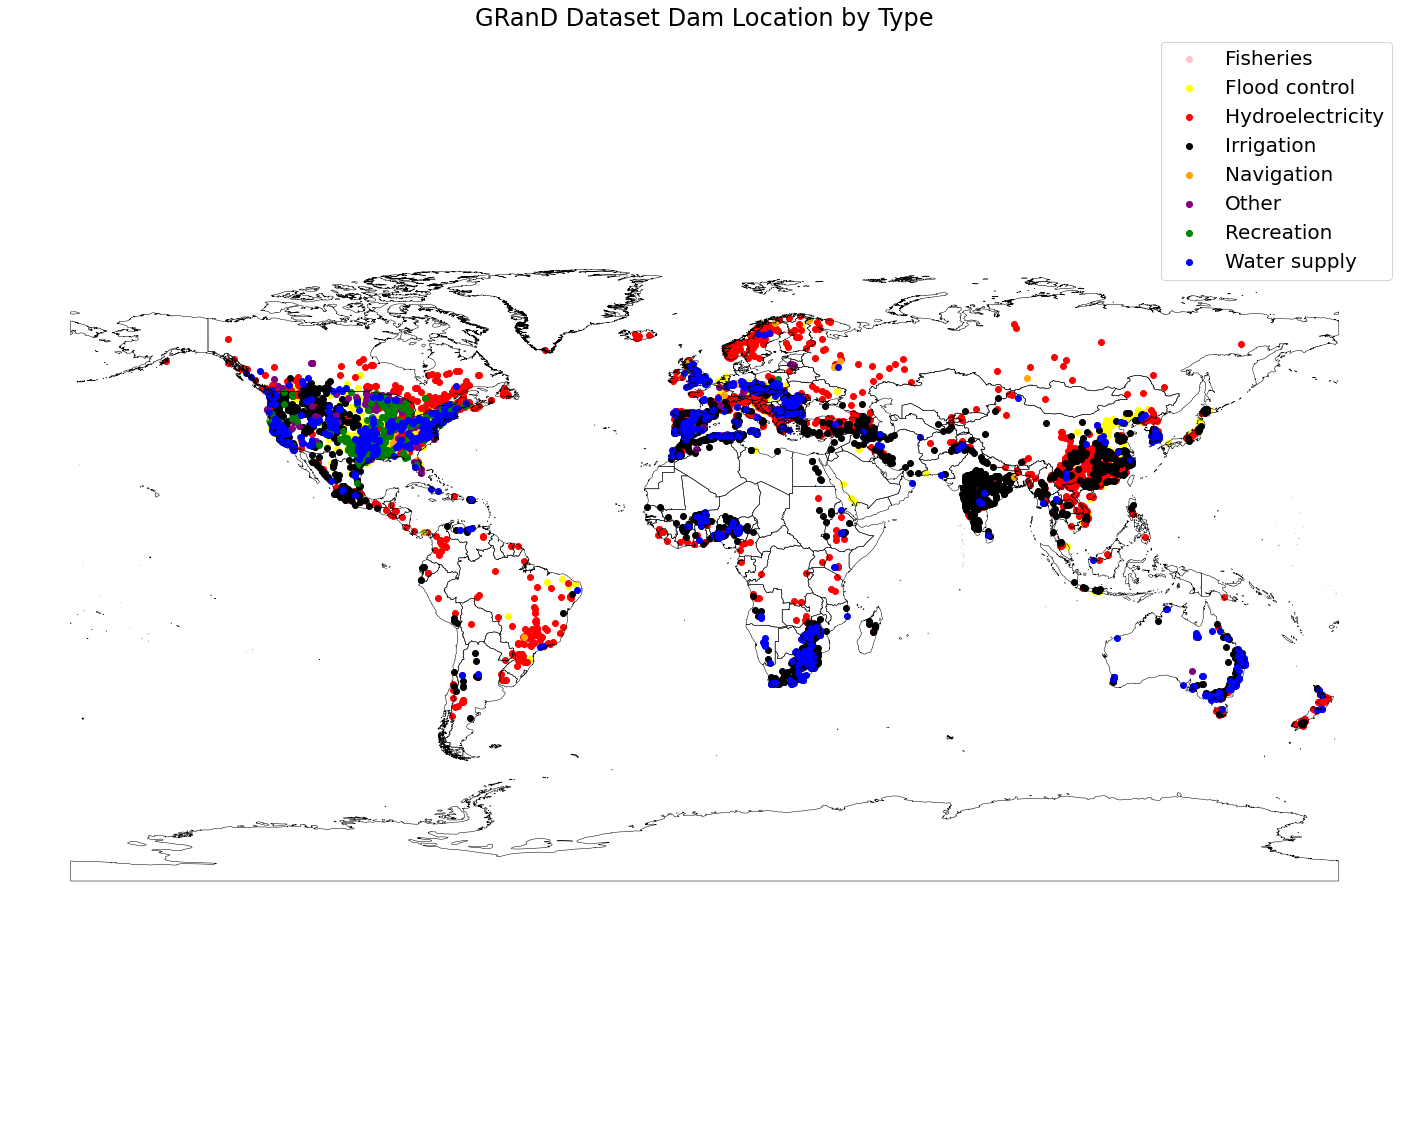

In [3]:
# Create global map figure of dam types
# Color dictionary
dam_color = {'Irrigation': 'black',
             'Hydroelectricity': 'red',
             'Water supply': 'blue',
             'Flood control': 'yellow',
             'Recreation': 'green',
             'Other': 'purple',
             'Navigation': 'orange',
             'Fisheries': 'pink',
             'Unknown': 'magenta'}

# Plot the data
fig, ax = plt.subplots(figsize=(25, 20))

# Plot each dam colored by Main Use
for ctype, dams in global_dams.groupby('MAIN_USE'):
    color_dam = dam_color[ctype]
    label = ctype
    dams.plot(color=color_dam,
              ax=ax,
              label=label)

# Plot the global countries borders map
countries_border.plot(color="none", edgecolor="black", linewidth=.5, ax=ax)

# Set legend, title, and plot settings
ax.legend()
ax.set_title("GRanD Dataset Dam Location by Type", fontsize=24)
plt.legend(fontsize=20)
ax.set_axis_off()
plt.axis('equal')

plt.show()

Figure 3: Global map with country boundaries and dams plotted by type (Fisheries, Flood control, Hydroelectricity, Irrigation, Navigation, Other, Recreation, and Water supply). Uses the GRanD database.

## Summary/ Conclusions

Our project is at the data gathering and exploration stage and we will be better positioned to address our specific research questions over the next couple of months. We are interested in the geographic patterns in the types of dams by continent and how they alter the free-flowing status of rivers. As a preliminary step, we examined the number of dams by type across six continents . 
The barcharts (figure 4) show that there is spatial variation in the types of dams and their densities across continents, which may be related to both differences in human needs in an area, level of industrial development, and data quality in representing dams on the landscape.

In [4]:
# Workflow for splitting dams by continent in separate df and process
# Note:code is repeated for 6 continents, we will work to automate this task into a function

# Create list of countries in each continent
africa_country = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Cameroon',
                  'Congo', 'Congo (DRC)', 'Egypt', 'Eritrea', 'Ethiopia', 'Gabon',
                  'Ghana', 'Guinea', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia',
                  'Libya', 'Madagascar', 'Mali', 'Mauritania', 'Morocco', 'Mozambique',
                  'Namibia', 'Nigeria', 'Senegal', 'Sierra Leone', 'South Africa',
                  'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda',
                  'Zambia', 'Zimbabwe']

asia_country = ['Afghanistan', 'Bahrain', "Bangladesh", "Bhutan", "Brunei",
                'Myanmar (Burma)', 'Myanmar', 'Cambodia', 'China', 'East Timor',
                'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
                'Kazakhstan', 'North Korea', 'South Korea', 'Kuwait', 'Kyrgyzstan',
                'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Nepal',
                'Oman', 'Pakistan', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia',
                'Singapore', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand',
                'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan',
                'Vietnam', 'Yemen']

europe_country = ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus',
                  'Belgium', 'Bosnia', 'Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus',
                  'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
                  'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
                  'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
                  'Macedonia', 'Malta', 'Moldova', 'Monaco', 'Montenegro',
                  'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino',
                  'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
                  'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City']

namerica_country = ['Antigua', 'Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada',
                    'Costa Rica', 'Cuba', 'Dominica', 'Congo (DRC)', ' Dominican Republic',
                    'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras',
                    'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts',
                    'Nevis', 'Saint Lucia', 'Saint Vincent', 'Grenadines', 'Trinidad',
                    'Tobago', 'United States']

samerica_country = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
                    'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']

oceania_country = ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia',
                   'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa',
                   'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']

# Select for dams by continent to new df
dam_africa = global_dams[global_dams['COUNTRY'].isin(africa_country)]
dam_asia = global_dams[global_dams['COUNTRY'].isin(asia_country)]
dam_europe = global_dams[global_dams['COUNTRY'].isin(europe_country)]
dam_namerica = global_dams[global_dams['COUNTRY'].isin(namerica_country)]
dam_samerica = global_dams[global_dams['COUNTRY'].isin(samerica_country)]
dam_oceania = global_dams[global_dams['COUNTRY'].isin(oceania_country)]

# Create uses to add
Fisheries = {'MAIN_USE': "Fisheries"}
Navigation = {'MAIN_USE': "Navigation"}
Recreation = {'MAIN_USE': "Recreation"}
Other = {'MAIN_USE': "Other"}

# Add use rows to continent df as needed
dam_africa = dam_africa.append(Fisheries, ignore_index=True)
dam_africa = dam_africa.append(Navigation, ignore_index=True)

dam_asia = dam_asia.append(Fisheries, ignore_index=True)
dam_asia = dam_asia.append(Recreation, ignore_index=True)

dam_samerica = dam_samerica.append(Fisheries, ignore_index=True)
dam_samerica = dam_samerica.append(Recreation, ignore_index=True)
dam_samerica = dam_samerica.append(Other, ignore_index=True)

dam_oceania = dam_oceania.append(Fisheries, ignore_index=True)
dam_oceania = dam_oceania.append(Navigation, ignore_index=True)

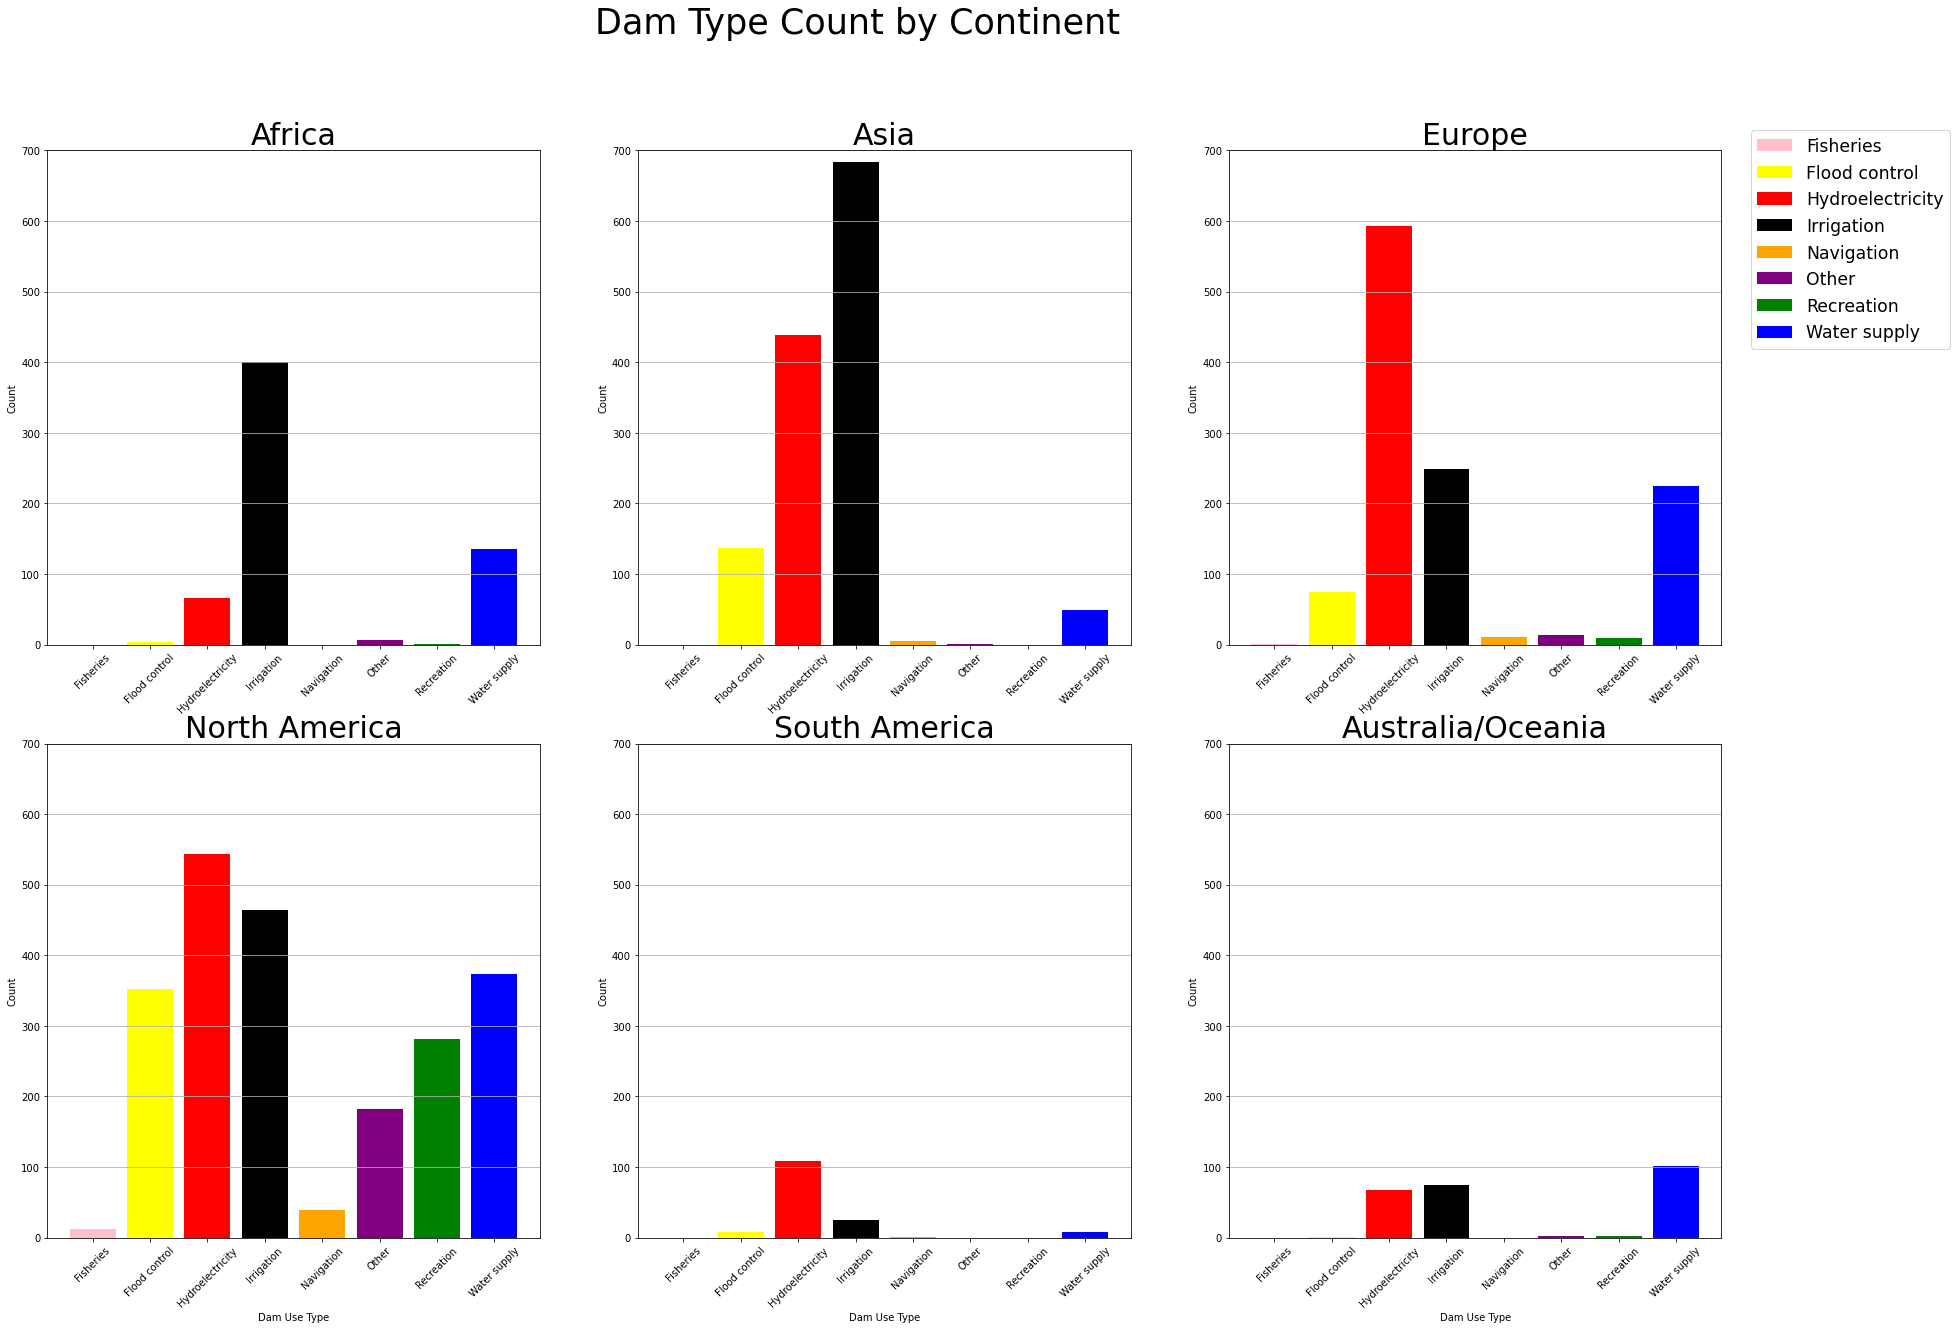

In [5]:
# Create barchart figure of dam type counts by continent

# Plot the data
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(
    ncols=3, nrows=2, figsize=(30, 20))
fig.suptitle("Dam Type Count by Continent", fontsize=35)

# Create Plots
# Plot Africa
for ctype, dam in dam_africa.groupby("MAIN_USE"):
    color_dam = dam_color[ctype]
    label = ctype
    dam_count = dam.count()
    ax1.bar(ctype,
            dam_count["GRAND_ID"],
            color=color_dam,
            label=label)
    ax1.set(ylabel="Count")
    ax1.set_ylim(0, 700)
    ax1.set_title('Africa', fontsize=30)
ax1.grid(axis="y")

# Plot Asia
for ctype, dam in dam_asia.groupby("MAIN_USE"):
    color_dam = dam_color[ctype]
    label = ctype
    dam_count = dam.count()
    ax2.bar(ctype,
            dam_count["GRAND_ID"],
            color=color_dam,
            label=label)
    ax2.set_ylim(0, 700)
    ax2.set(title="Asia",
            ylabel="Count")
    ax2.set_title('Asia', fontsize=30)
ax2.grid(axis="y")

# Plot Europe
for ctype, dam in dam_europe.groupby("MAIN_USE"):
    color_dam = dam_color[ctype]
    label = ctype
    dam_count = dam.count()
    ax3.bar(ctype,
            dam_count["GRAND_ID"],
            color=color_dam,
            label=label)
    ax3.set_ylim(0, 700)
    ax3.set(title="Europe",
            ylabel="Count")
    ax3.set_title('Europe', fontsize=30)
ax3.grid(axis="y")

# Plot North America
for ctype, dam in dam_namerica.groupby("MAIN_USE"):
    color_dam = dam_color[ctype]
    label = ctype
    dam_count = dam.count()
    ax4.bar(ctype,
            dam_count["GRAND_ID"],
            color=color_dam,
            label=label)
    ax4.set(title="North America",
            xlabel="Dam Use Type",
            ylabel="Count")
    ax4.set_ylim(0, 700)
    ax4.set_title('North America', fontsize=30)
ax4.grid(axis="y")

# Plot South America
for ctype, dam in dam_samerica.groupby("MAIN_USE"):
    color_dam = dam_color[ctype]
    label = ctype
    dam_count = dam.count()
    ax5.bar(ctype,
            dam_count["GRAND_ID"],
            color=color_dam,
            label=label)
    ax5.set_ylim(0, 700)
    ax5.set(title="South America",
            xlabel="Dam Use Type",
            ylabel="Count")
    ax5.set_title('South America', fontsize=30)
ax5.grid(axis="y")

# Plot Australia and Oceania
for ctype, dam in dam_oceania.groupby("MAIN_USE"):
    color_dam = dam_color[ctype]
    label = ctype
    dam_count = dam.count()
    ax6.bar(ctype,
            dam_count["GRAND_ID"],
            color=color_dam,
            label=label)
    ax6.set_ylim(0, 700)
    ax6.set(title="Australia/Oceania",
            xlabel="Dam Use Type",
            ylabel="Count")
    ax6.set_title('Australia/Oceania', fontsize=30)
ax6.grid(axis="y")

# Rotate x-axis labels
plt.setp((ax1.get_xticklabels(), ax2.get_xticklabels(), ax3.get_xticklabels(
), ax4.get_xticklabels(), ax5.get_xticklabels(), ax6.get_xticklabels(), ), rotation=45)

# Create legend
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc=1, bbox_to_anchor=(
    1.01, 0.9), fontsize='xx-large')

plt.show()

Figure 4: Bar charts of the number of dams by type across six continents. Uses GRanD database.

C:\Users\Owner\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


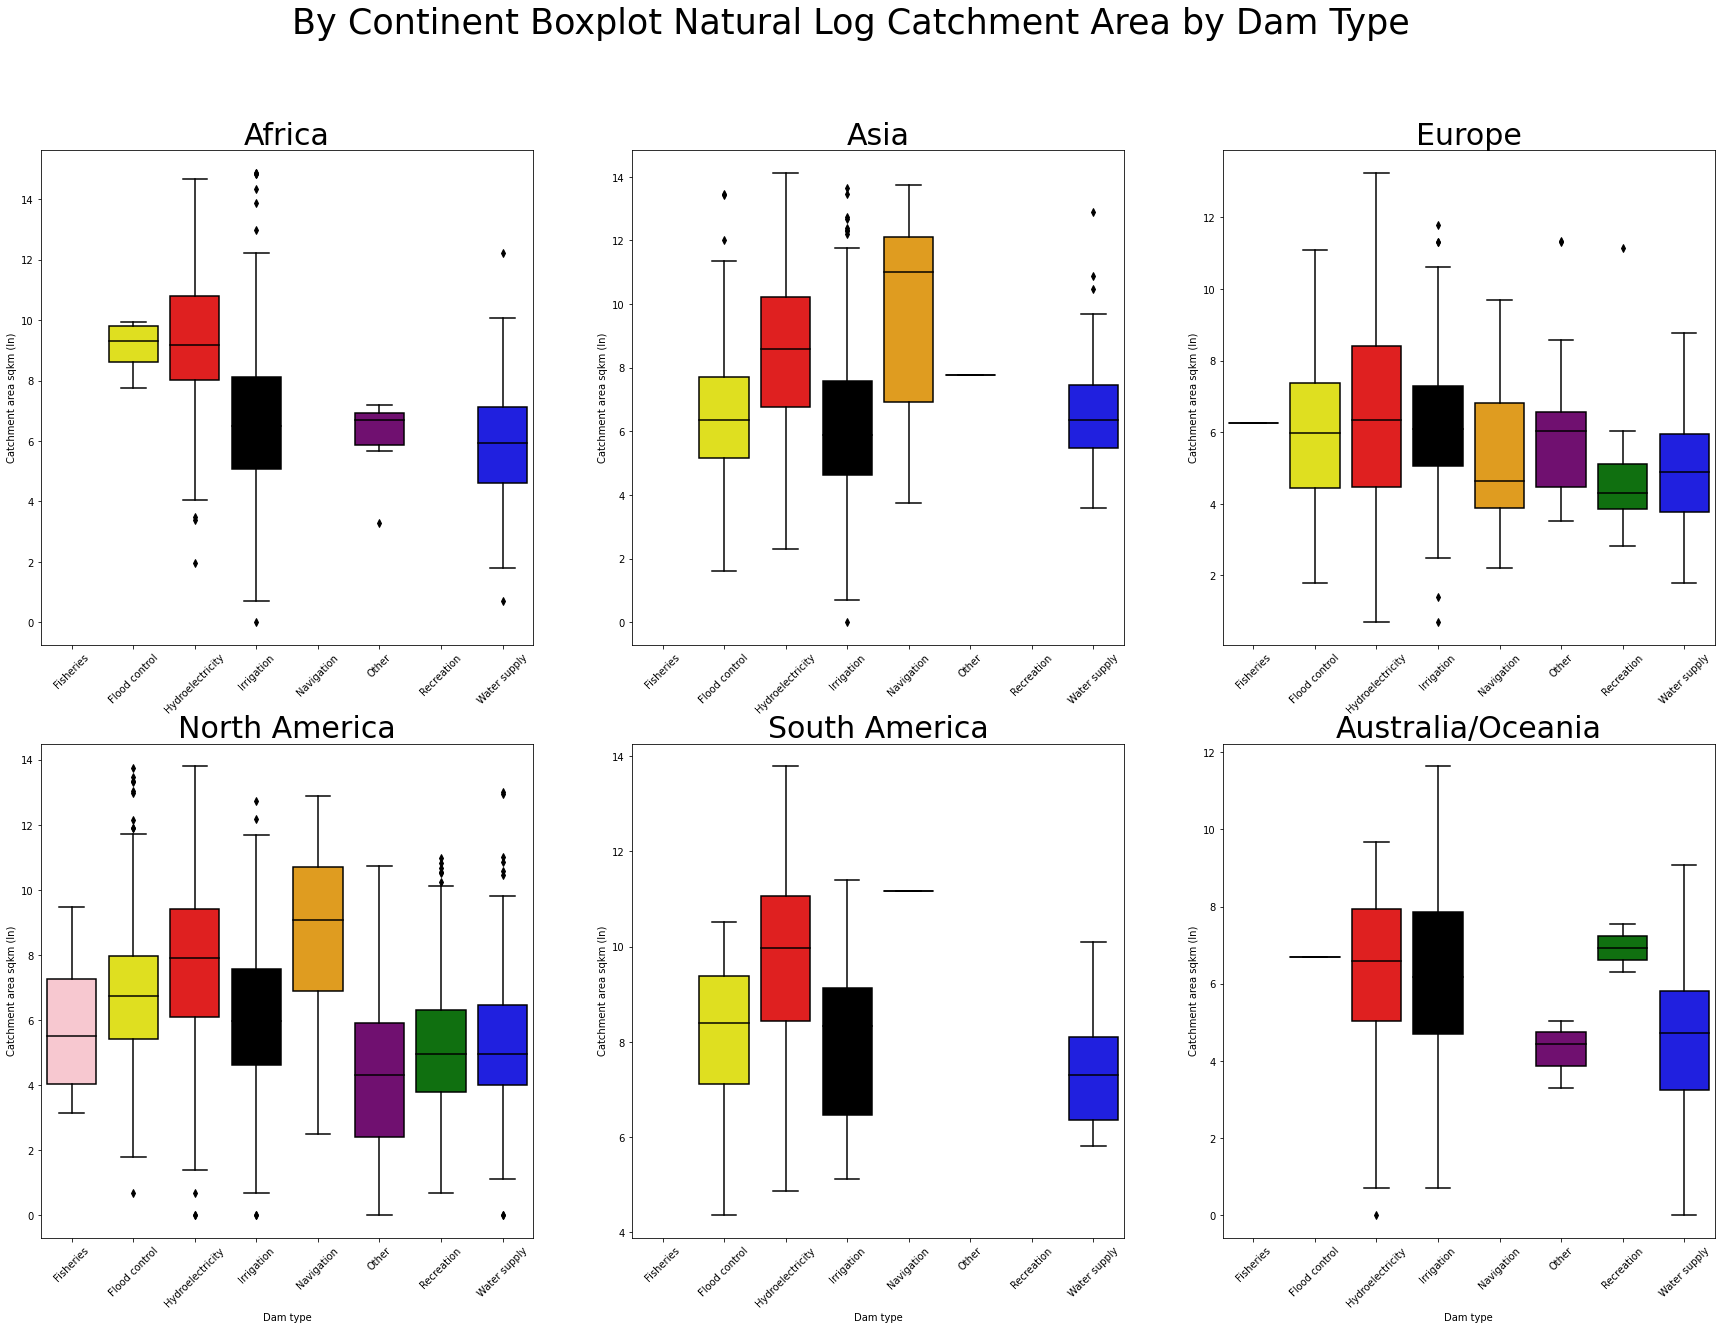

In [6]:
# BOXPLOTS CATCHMENT AREA (ln) BY DAM TYPE
# Processing to create log catchment area values for boxplots

dam_africa['ln_CATCH_SKM'] = np.log(dam_africa['CATCH_SKM'])
dam_africa = dam_africa.sort_values('MAIN_USE')

dam_asia['ln_CATCH_SKM'] = np.log(dam_asia['CATCH_SKM'])
dam_asia = dam_asia.sort_values('MAIN_USE')

dam_europe['ln_CATCH_SKM'] = np.log(dam_europe['CATCH_SKM'])
dam_europe = dam_europe.sort_values('MAIN_USE')

dam_namerica['ln_CATCH_SKM'] = np.log(dam_namerica['CATCH_SKM'])
dam_namerica = dam_namerica.sort_values('MAIN_USE')

dam_samerica['ln_CATCH_SKM'] = np.log(dam_samerica['CATCH_SKM'])
dam_samerica = dam_samerica.sort_values('MAIN_USE')

dam_oceania['ln_CATCH_SKM'] = np.log(dam_oceania['CATCH_SKM'])
dam_oceania = dam_oceania.sort_values('MAIN_USE')

# Create boxplot figure of dam type counts by continent

# Plot the data
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(
    ncols=3, nrows=2, figsize=(30, 20))
fig.suptitle(
    "By Continent Boxplot Natural Log Catchment Area by Dam Type", fontsize=35)

# Create plots
# Plot Africa
sns.boxplot(x="MAIN_USE", y="ln_CATCH_SKM",
            data=dam_africa, palette=dam_color, ax=ax1)
ax1.xaxis.set_tick_params(rotation=45)
ax1.set(xlabel="", ylabel="Catchment area sqkm (ln)")
ax1.set_title('Africa', fontsize=30)

# Plot Asia
sns.boxplot(x="MAIN_USE", y="ln_CATCH_SKM",
            data=dam_asia, palette=dam_color, ax=ax2)
ax2.xaxis.set_tick_params(rotation=45)
ax2.set(xlabel="", ylabel="Catchment area sqkm (ln)")
ax2.set_title('Asia', fontsize=30)

# Plot Europe
sns.boxplot(x="MAIN_USE", y="ln_CATCH_SKM",
            data=dam_europe, palette=dam_color, ax=ax3)
ax3.xaxis.set_tick_params(rotation=45)
ax3.set(xlabel="", ylabel="Catchment area sqkm (ln)")
ax3.set_title('Europe', fontsize=30)

# Plot North America
sns.boxplot(x="MAIN_USE", y="ln_CATCH_SKM",
            data=dam_namerica, palette=dam_color, ax=ax4)
ax4.xaxis.set_tick_params(rotation=45)
ax4.set(xlabel="Dam type",
        ylabel="Catchment area sqkm (ln)")
ax4.set_title('North America', fontsize=30)

# Plot South America
sns.boxplot(x="MAIN_USE", y="ln_CATCH_SKM",
            data=dam_samerica, palette=dam_color, ax=ax5)
ax5.xaxis.set_tick_params(rotation=45)
ax5.set(xlabel="Dam type",
        ylabel="Catchment area sqkm (ln)")
ax5.set_title('South America', fontsize=30)

# Plot Australia and Oceania
sns.boxplot(x="MAIN_USE", y="ln_CATCH_SKM",
            data=dam_oceania, palette=dam_color, ax=ax6)
ax6.xaxis.set_tick_params(rotation=45)
ax6.set(xlabel="Dam type",
        ylabel="Catchment area sqkm (ln)")
ax6.set_title('Australia/Oceania', fontsize=30)


plt.show()

Figure 5: Box and Whisker plots of the log catchment area upstream of dams by type across six continents. Uses GRanD database.

We also examined patterns between landscape characteristics and dam type (figure 5). At a global scale, there are distinct patterns in river catchment area and dam type such that hydroelectric and navigation dams tend to be built on large sized catchments, whereas dams built for water supply and flood control tend to be built in smaller sized catchments. Across the six continents we see similar patterns . These relationships provide insight on how much river discharge the dam may be intercepting and altering downstream flow. 

The FFR is very data rich and may pose some challenges to work with. We will work with river and dam data in Africa as a pilot project to develop our methods because it has a moderate amount of information yet still includes a variety of dam types. We will later apply our methods to the other continents. We filtered the free-flowing river data for Africa by including river reach objects that had been QAQCed by the dataset developer that was indicated by INC==1. This resulted in ~411,000 reach objects and made the data a bit more manageable. We color coded the FRR river reach data by River Order to examine spatial patterns in river size (figure 6). River Order is a metric developed for the FFR dataset that ranks river reaches by their position along a river network with values ranging from 1 to 10. The interpretation of river order is 1 being very large and 10 as small, headwater rivers. Overlaying the GRanD dams over the FFR data, we see spatial patterns in where dams and their use are located in Africa. Water supply and irrigation dams are spatially clustered, whereas hydroelectric dams appear more dispersed across the continent.

In [7]:
# Load FFR dataset for map of Africa
# VERY COMPUTATIONALY INTENSIVE: easily around 20 minutes.

# Import Continent Boundary and Subset for Africa
africa_border = continent_border[continent_border['CONTINENT'] == 'Africa']

# Free-flowing river data exploration and processing steps
# NOTE: river layer is REALLY big and need to load only portions of it
#       We spoke with Natalie from WWF and she suggested using the following filters
#       Only load river reaches "INC"==1 (Grill et al indicated which reaches included in analyses)

# Specify bounding box coordinates centered around Africa to load subset of data
bbox = (-28.476563, -36.173357, 55.195313, 37.857507)

# Path where free-flowing river geodatabase is unzipped
river_path = os.path.join("earthpy-downloads", "Mapping%20the%20worlds%20free-flowing%20rivers_Data_Geodatabase",
                          "Mapping the worlds free-flowing rivers_Data_Geodatabase",
                          "FFR_river_network.gdb")

# Read in the ffr data
ffr_all = gpd.read_file(river_path,
                        bbox=bbox)

In [8]:
# Subset necessary columns to working df
# Select river reaches in "Africa" and reaches QAQCed in the Grill et al. analysis
ffr_all_sub = ffr_all[['REACH_ID', 'CONTINENT', 'RIV_ORD', 'geometry', 'INC']]
ffr_all_ord1 = ffr_all_sub[ffr_all_sub['INC'] == 1]
ffr_africa = ffr_all_ord1[ffr_all_ord1['CONTINENT'] == 'Africa']

# Reprocess africa dams for new plot
dam_africa = global_dams[global_dams['COUNTRY'].isin(africa_country)]

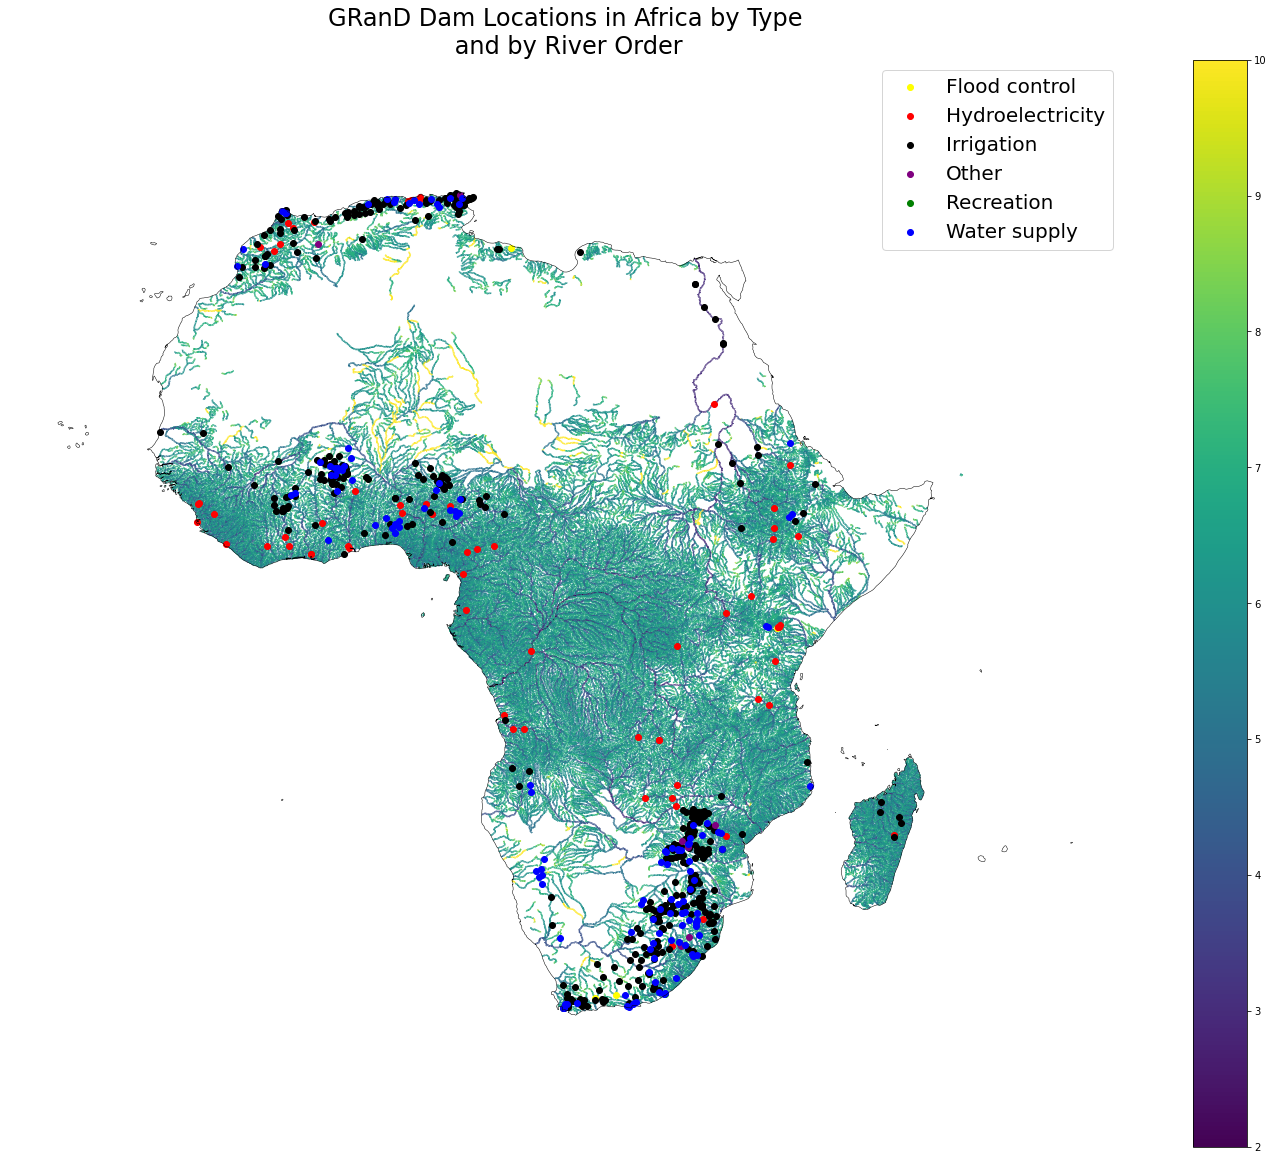

In [9]:
# Map Grand Dam and FFR river for Africa
# Plot the data
fig, ax = plt.subplots(figsize=(25, 20))
ffr_africa.plot(column='RIV_ORD',
                legend=True,
                ax=ax, zorder=0)

for ctype, dams in dam_africa.groupby('MAIN_USE'):
    color_dam = dam_color[ctype]
    label = ctype
    dams.plot(color=color_dam,
                    ax=ax,
                    label=label)

africa_border.plot(color="none", edgecolor="black",
                   linewidth=.5, ax=ax, zorder=5)

ax.legend()
ax.set_title(
    "GRanD Dam Locations in Africa by Type\n and by River Order", fontsize=24)
plt.legend(fontsize=20)
ax.set_axis_off()
plt.axis('equal')
plt.show()

Figure 6: Chart of Africa plotting River Order and Dam Locations by Type. Uses GRanD database and FFR database.

## Next Steps

Our next steps are to develop criteria to filter the FFR dataset to make it more manageable. We also plan on automating some of our workflow by creating functions and having less copy and paste work. We are working with Jeff and Natalie to determine if we can subset reaches by River Order, e.g.,  River Order 10 reaches are likely to be very small and not have GRanD dams. Ultimately, we are interested in examining patterns and relationships among dam types and river connectivity and how they vary across geographic settings. To do this we need to spatially join the GRanD and FRR datasets to look at the dam and river attributes together. We will work with Jeff and Natalie to develop other response metrics of interest to quantify how dams may disrupt free-flowing status of rivers. For example we are interested in weighting dams by the proportion of river discharge they intercept relative to the full river network to assess how they may impact the movement of water, materials, and organisms across the landscape. We hypothesize that dams that are built in upper headwater reaches may have more localized impacts compared to dams further down the river network that may significantly disrupt the accumulation of materials moving to downstream areas. We will work closely with our mentors at WWF and apply reproducible open science practices to our code development. 

## Literature cited

Grill, G., B. Lehner, M. Thieme, and others. 2019. Mapping the world’s free-flowing rivers. Nature 569: 215–221. doi:10.1038/s41586-019-1111-9

Lehner, B., C. R. Liermann, C. Revenga, and others. 2011. High-resolution mapping of the world’s reservoirs and dams for sustainable river-flow management. Frontiers in Ecology and the Environment 9: 494–502. doi:10.1890/100125